In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
ENRICHED_WKLY_FILE_NAME = os.path.join('data', 'clean', 'regional-us-weekly-enriched.csv')
ENRICHED_2017 = os.path.join('data', '2017_clean', 'enriched2017.csv')

# Load Enriched Spotify Weekly Data

In [3]:
wkly_data_2018_df = pd.read_csv(ENRICHED_WKLY_FILE_NAME)
wkly_data_2018_df.head()

,Position,Track Name,Artist,Streams,URL,Week Start Date,Week End Date,Acousticness,Album,Danceability,...,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
0,1,rockstar,Post Malone,10134471,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-29,2018-01-05,0.130000,rockstar,0.577,...,0.000090,5,0.1420,-6.594,0,28,0.0984,159.772,4,0.1190
1,2,No Limit,G-Eazy,7090891,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...,2017-12-29,2018-01-05,0.011700,The Beautiful & Damned,0.838,...,0.000000,1,0.0853,-3.791,1,72,0.2440,175.957,4,0.4050
2,3,I Fall Apart,Post Malone,6673907,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,2017-12-29,2018-01-05,0.068900,Stoney (Deluxe),0.556,...,0.000000,8,0.1960,-5.408,0,87,0.0382,143.950,4,0.2910
3,4,Bartier Cardi (feat. 21 Savage),Cardi B,6624198,https://open.spotify.com/track/75FDPwaULRdYDn4...,2017-12-29,2018-01-05,0.000704,Bartier Cardi (feat. 21 Savage),0.909,...,0.000823,8,0.3600,-7.513,1,66,0.1750,138.043,4,0.0986
4,5,Gucci Gang,Lil Pump,5975507,https://open.spotify.com/track/43ZyHQITOjhciSU...,2017-12-29,2018-01-05,0.239000,Lil Pump,0.936,...,0.000000,5,0.1170,-6.710,1,78,0.0597,119.889,4,0.6990


## Compute Top 10 Tracks for 2018

In [4]:
track_and_features_df = wkly_data_2018_df.drop(['Position', 'URL', 'Week Start Date', 'Week End Date', 'Album'], axis=1)
agg_by_track_df = track_and_features_df.groupby(['Track Name', 'Artist']).agg({
    'Streams':'sum', 'Acousticness':'max', 'Danceability':'max', 'Key':'min', 'Liveness':'max', 'Loudness':'max',
    'Popularity':'max', 'Speechiness':'max', 'Tempo':'max', 'Time Signature':'max', 'Valence':'max', 'Energy':'max', 'Instrumentalness':'max', 'Mode':'max'}) 
sorted_by_total_streams_df = agg_by_track_df.sort_values(by="Streams", ascending=False).reset_index()
top_10_2018_df = sorted_by_total_streams_df.head(n=10)
top_10_2018_df['Label'] = top_10_2018_df['Track Name'] + ' (' + top_10_2018_df['Artist'] + ")"
top_10_2018_df

,Track Name,Artist,Streams,Acousticness,Danceability,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Time Signature,Valence,Energy,Instrumentalness,Mode,Label
0,God's Plan,Drake,460070262,0.03320,0.758,7,0.558,-9.211,90,0.1090,77.179,4,0.373,0.449,0.000087,1,God's Plan (Drake)
1,SAD!,XXXTENTACION,340496175,0.25800,0.740,8,0.123,-4.880,92,0.1450,75.023,4,0.473,0.613,0.003720,1,SAD! (XXXTENTACION)
2,Psycho (feat. Ty Dolla $ign),Post Malone,310156476,0.59000,0.748,8,0.112,-8.011,88,0.1170,140.124,4,0.439,0.559,0.000000,1,Psycho (feat. Ty Dolla $ign) (Post Malone)
3,Lucid Dreams,Juice WRLD,303942353,0.37700,0.511,6,0.340,-7.230,89,0.2370,83.903,4,0.218,0.566,0.000000,0,Lucid Dreams (Juice WRLD)
4,Look Alive (feat. Drake),BlocBoy JB,268178220,0.00104,0.922,10,0.105,-7.495,86,0.2700,140.022,4,0.595,0.581,0.000059,1,Look Alive (feat. Drake) (BlocBoy JB)
5,Nice For What,Drake,267229876,0.09340,0.700,8,0.119,-6.461,86,0.0736,93.469,4,0.792,0.913,0.000124,1,Nice For What (Drake)
6,Better Now,Post Malone,254685346,0.35400,0.680,10,0.136,-5.843,92,0.0454,145.028,4,0.374,0.563,0.000000,1,Better Now (Post Malone)
7,Moonlight,XXXTENTACION,249897971,0.55600,0.921,9,0.102,-5.723,91,0.0804,128.009,4,0.711,0.537,0.004040,0,Moonlight (XXXTENTACION)
8,In My Feelings,Drake,247009164,0.05890,0.835,1,0.448,-5.833,90,0.1390,181.995,4,0.350,0.626,0.014400,1,In My Feelings (Drake)
9,I Like It,Cardi B,239838666,0.09900,0.816,5,0.372,-3.998,90,0.1290,136.048,4,0.650,0.726,0.000000,0,I Like It (Cardi B)


# Load Enriched 2017 Data

In [5]:
wkly_data_2017_df = pd.read_csv(ENRICHED_2017)
wkly_data_2017_df.head()

,Position,Track Name,Artist,Streams,URL,Week Start Date,Week End Date,Acousticness,Album,Danceability,...,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,9212016,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-30,2017-01-06,0.061,Culture,0.927,...,0.000000,11,0.123,-5.313,1,78,0.2440,127.076,4,0.175
1,2,Fake Love,Drake,8402709,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-30,2017-01-06,0.108,More Life,0.927,...,0.000000,9,0.196,-9.433,0,76,0.4200,133.987,4,0.605
2,3,Starboy,The Weeknd,7634586,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,0.165,Starboy,0.681,...,0.000003,7,0.134,-7.028,1,25,0.2820,186.054,4,0.535
3,4,Closer,The Chainsmokers,6384465,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,0.414,Closer,0.748,...,0.000000,8,0.111,-5.599,1,85,0.0338,95.010,4,0.661
4,5,Black Beatles,Rae Sremmurd,5745384,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-30,2017-01-06,0.142,SremmLife 2 (Deluxe),0.794,...,0.000000,0,0.128,-6.163,1,77,0.0649,145.926,4,0.355


In [6]:
track_and_features_df = wkly_data_2017_df.drop(['Position', 'URL', 'Week Start Date', 'Week End Date', 'Album'], axis=1)
agg_by_track_df = track_and_features_df.groupby(['Track Name', 'Artist']).agg({
    'Streams':'sum', 'Acousticness':'max', 'Danceability':'max', 'Key':'min', 'Liveness':'max', 'Loudness':'max',
    'Popularity':'max', 'Speechiness':'max', 'Tempo':'max', 'Time Signature':'max', 'Valence':'max', 'Energy':'max', 'Instrumentalness':'max', 'Mode':'max'}) 
sorted_by_total_streams_df = agg_by_track_df.sort_values(by="Streams", ascending=False).reset_index()
top_10_2017_df = sorted_by_total_streams_df.head(n=10)
top_10_2017_df['Label'] = top_10_2017_df['Track Name'] + ' (' + top_10_2017_df['Artist'] + ")"
top_10_2017_df

,Track Name,Artist,Streams,Acousticness,Danceability,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Time Signature,Valence,Energy,Instrumentalness,Mode,Label
0,HUMBLE.,Kendrick Lamar,330903683,0.000282,0.908,1,0.0958,-6.638,85,0.1020,150.011,4,0.421,0.621,0.000054,0,HUMBLE. (Kendrick Lamar)
1,XO TOUR Llif3,Lil Uzi Vert,304014190,0.002640,0.732,11,0.1090,-6.366,86,0.2310,155.096,4,0.401,0.750,0.000000,0,XO TOUR Llif3 (Lil Uzi Vert)
2,Shape of You,Ed Sheeran,278551723,0.581000,0.825,1,0.0931,-3.183,86,0.0802,95.977,4,0.931,0.652,0.000000,0,Shape of You (Ed Sheeran)
3,Congratulations,Post Malone,274130012,0.215000,0.630,6,0.2530,-4.183,86,0.0363,123.146,4,0.492,0.804,0.000000,1,Congratulations (Post Malone)
4,Mask Off,Future,237877378,0.010200,0.833,2,0.1650,-8.795,81,0.4310,150.062,4,0.281,0.434,0.021900,1,Mask Off (Future)
5,Despacito - Remix,Luis Fonsi,234828183,0.229000,0.694,2,0.0924,-4.328,32,0.1200,88.931,4,0.813,0.815,0.000000,1,Despacito - Remix (Luis Fonsi)
6,iSpy (feat. Lil Yachty),KYLE,224786172,0.378000,0.746,7,0.2290,-6.745,76,0.2890,75.016,4,0.672,0.653,0.000000,1,iSpy (feat. Lil Yachty) (KYLE)
7,Location,Khalid,218371285,0.330000,0.736,1,0.0898,-11.462,83,0.4250,80.126,4,0.326,0.449,0.000162,0,Location (Khalid)
8,rockstar,Post Malone,211825002,0.130000,0.580,5,0.1430,-6.594,28,0.0984,159.786,4,0.141,0.531,0.000127,0,rockstar (Post Malone)
9,1-800-273-8255,Logic,211563851,0.570000,0.620,5,0.1900,-7.788,83,0.0479,100.021,4,0.352,0.574,0.000000,0,1-800-273-8255 (Logic)


# Compare Audio Features for Top 10, Worst Songs

In [7]:
def plot_comparison(feature):
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,10))

    top_10_2018_df.plot(kind='bar', x='Label', y=feature, legend=False, ax=ax1)
    ax1.set_title("Spotify Top 10 - 2018")
    ax1.set_xlabel("")
    ax1.set_ylabel(feature)

    top_10_2017_df.plot(kind='bar', x='Label', y=feature, legend=False, ax=ax2)
    ax2.set_title("Spotify Top 10 - 2017")
    ax2.set_xlabel("")
    ax2.set_ylabel(feature)

    plt.tight_layout()
    return fig

# Compare Energy

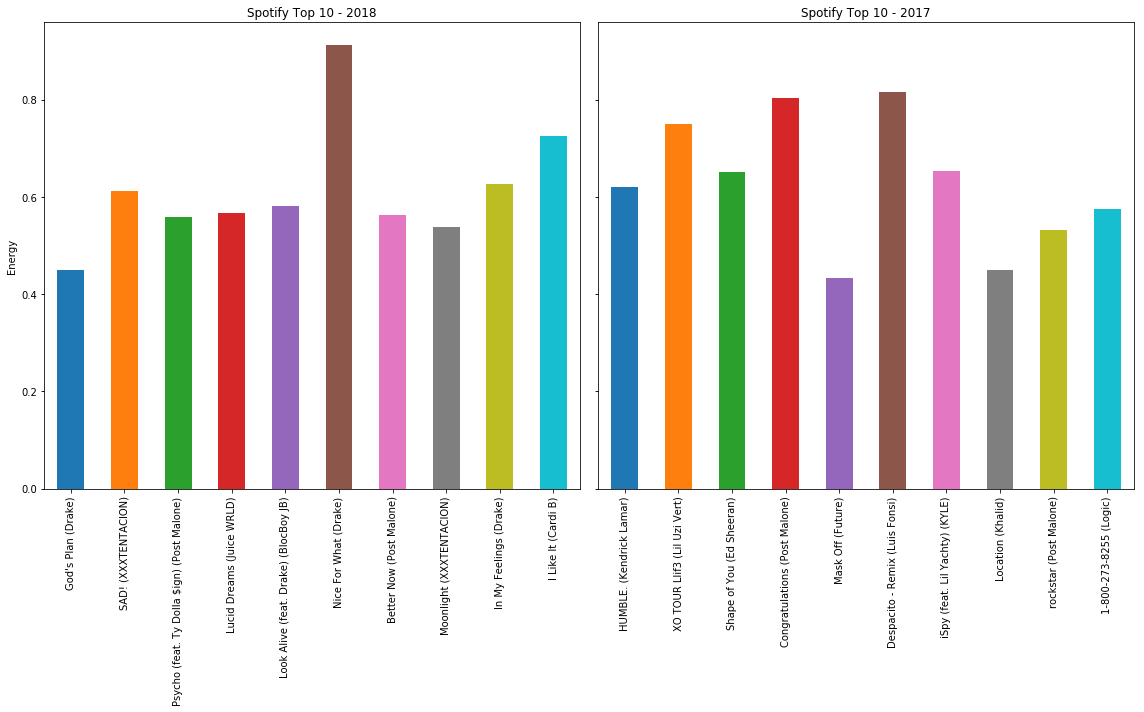

In [8]:
fig = plot_comparison('Energy')

# Compare Danceability

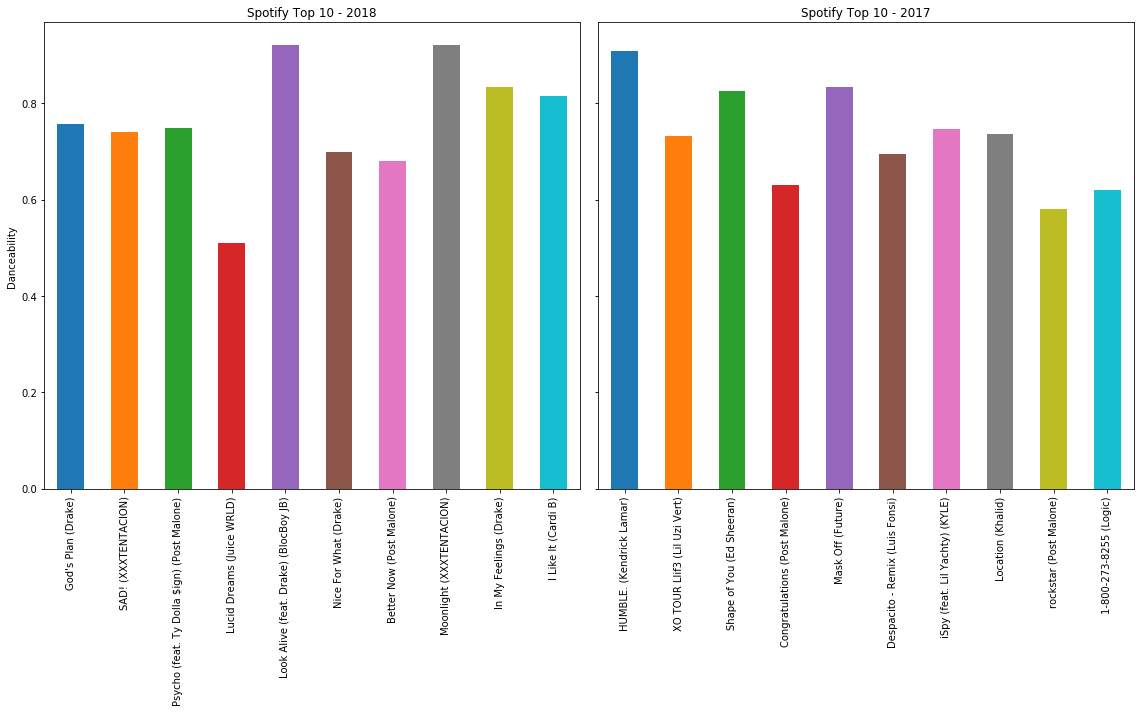

In [9]:
fig = plot_comparison('Danceability')

# Compare Tempo

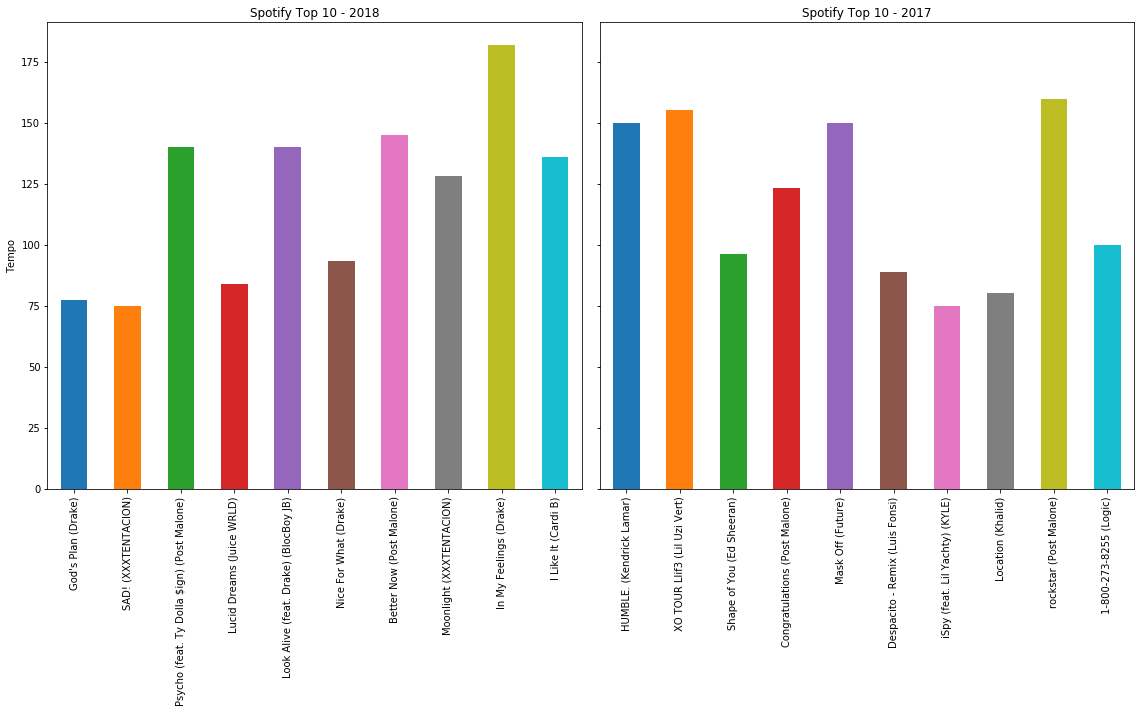

In [10]:
fig = plot_comparison('Tempo')

# Compare Loudness

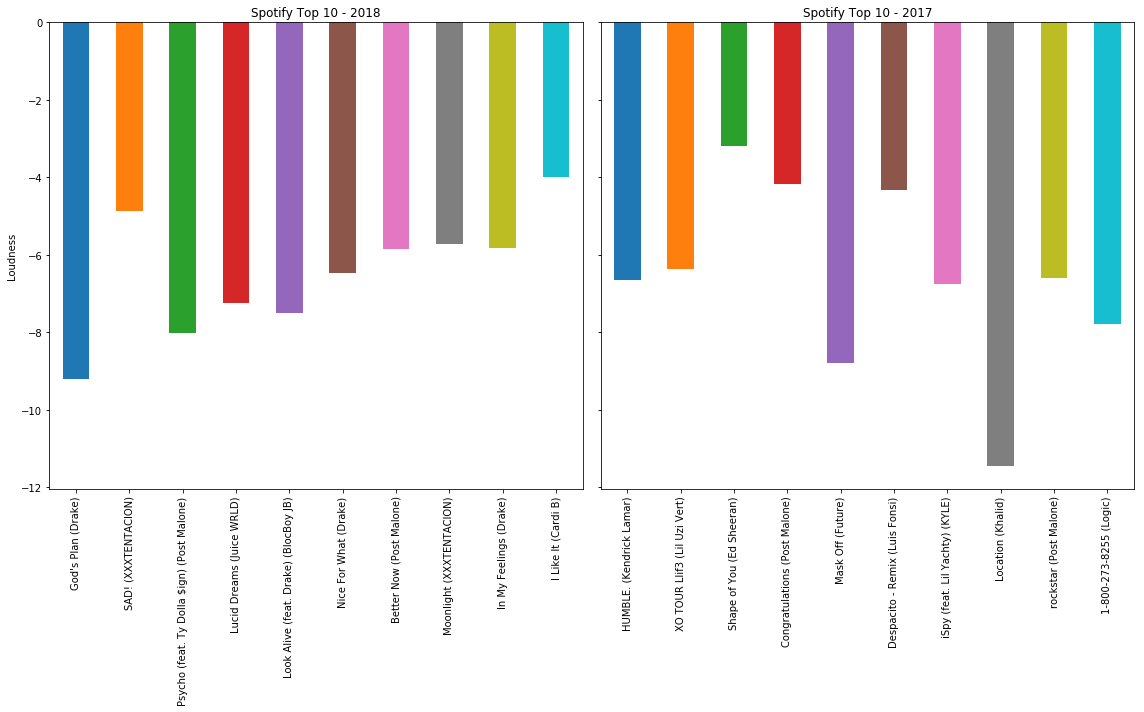

In [11]:
fig = plot_comparison('Loudness')

# Compare Liveness

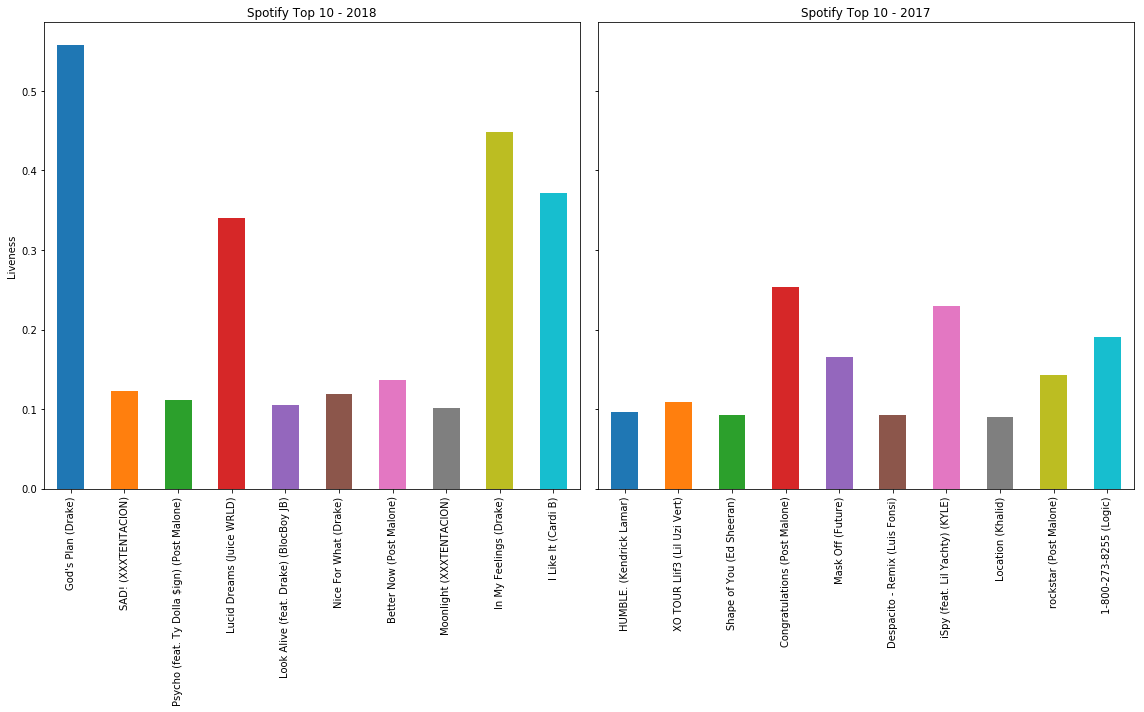

In [12]:
fig = plot_comparison('Liveness')

# Compare Acousticness

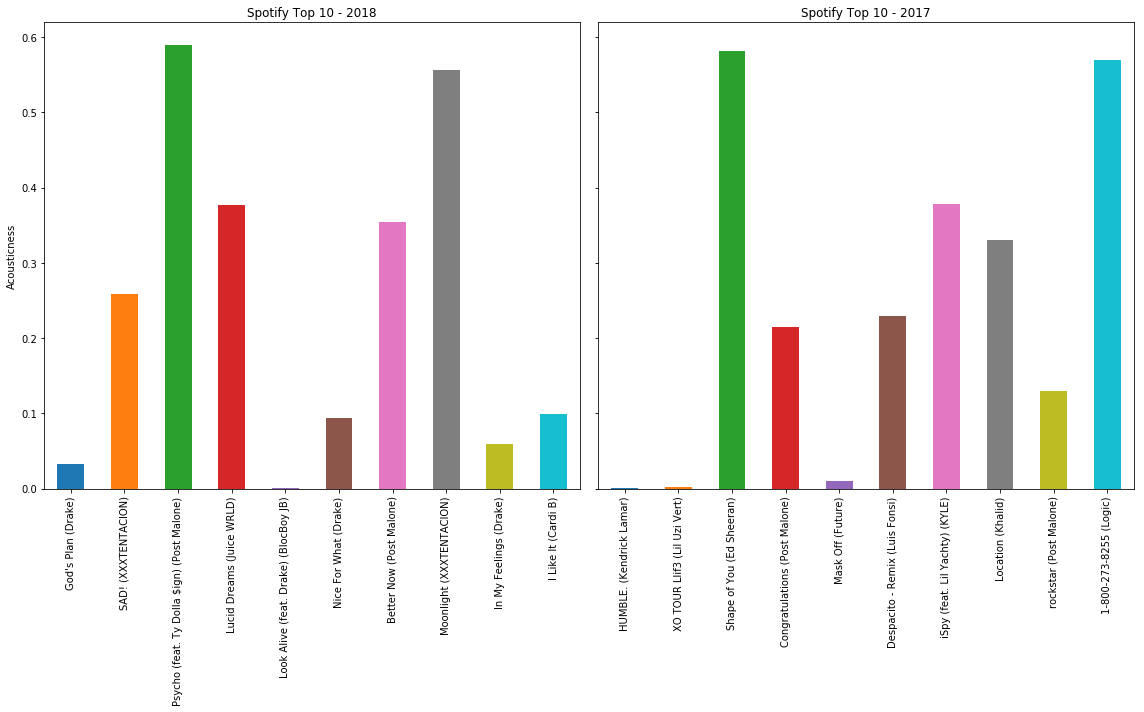

In [13]:
fig = plot_comparison('Acousticness')

# Compare Instrumentalness

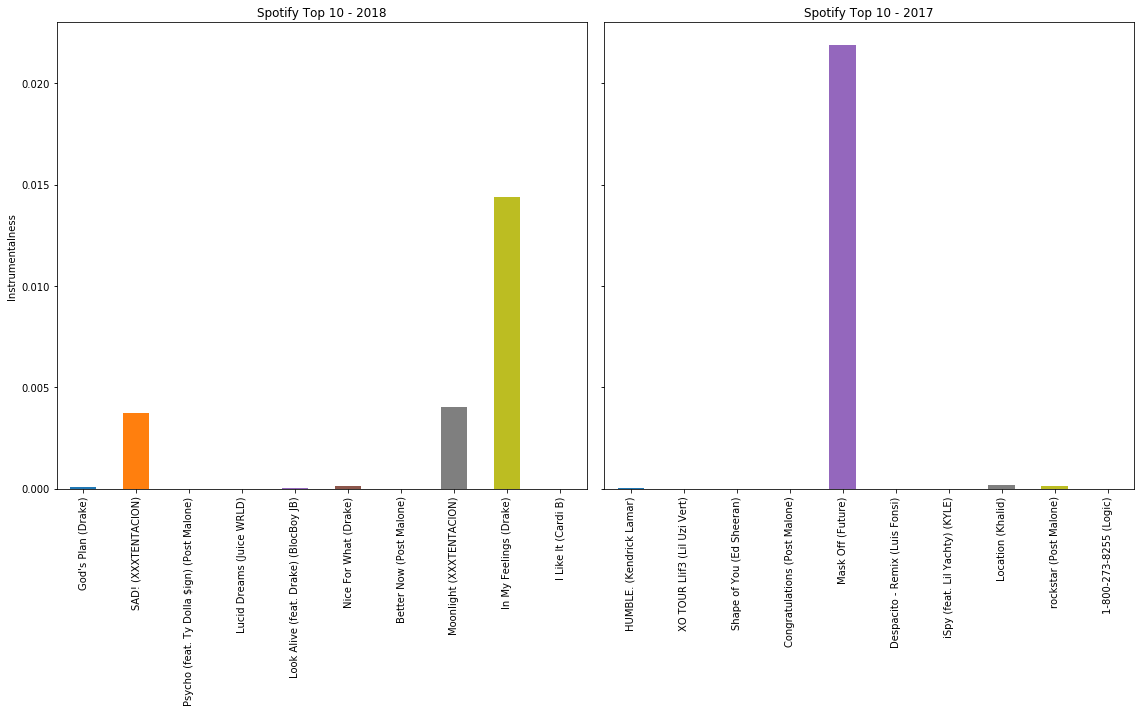

In [14]:
fig = plot_comparison('Instrumentalness')

# Compare Valence

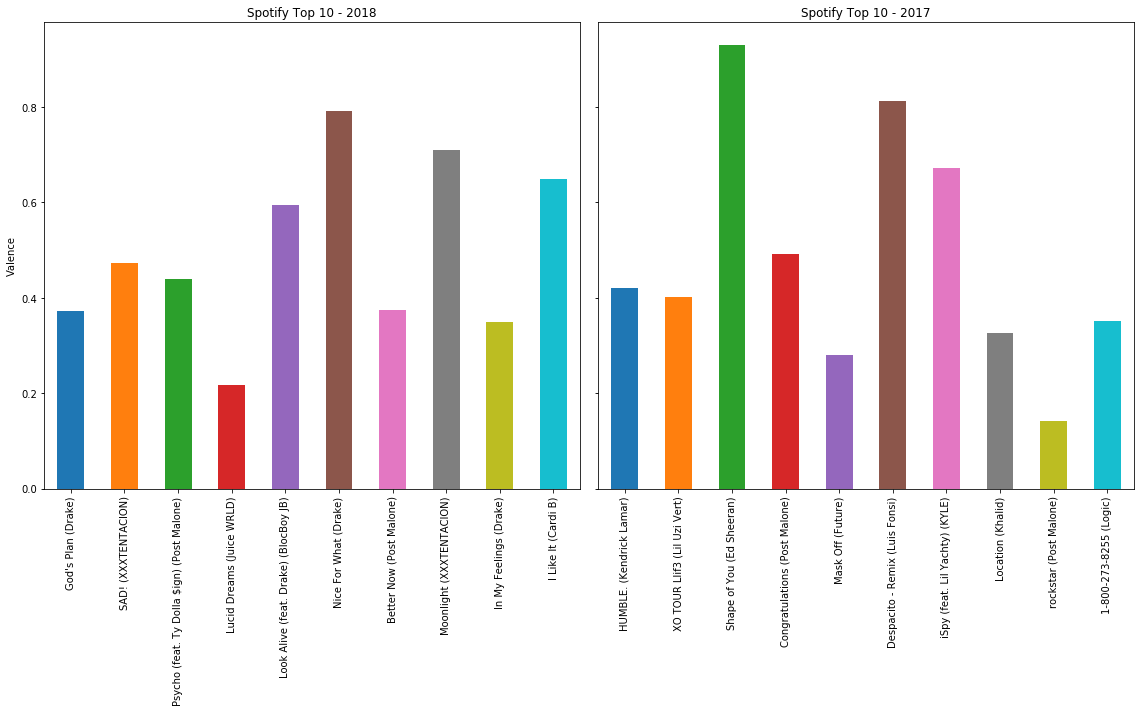

In [15]:
fig = plot_comparison('Valence')

# Compare Time Signature

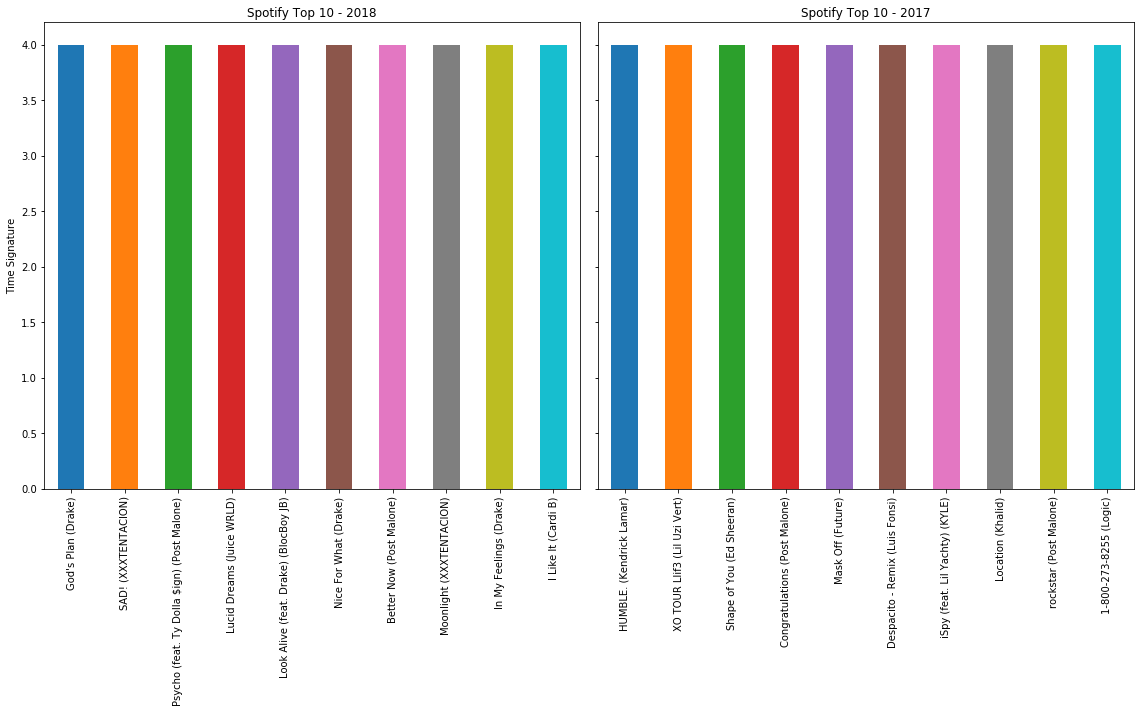

In [16]:
fig = plot_comparison('Time Signature')

# Compare Speechiness

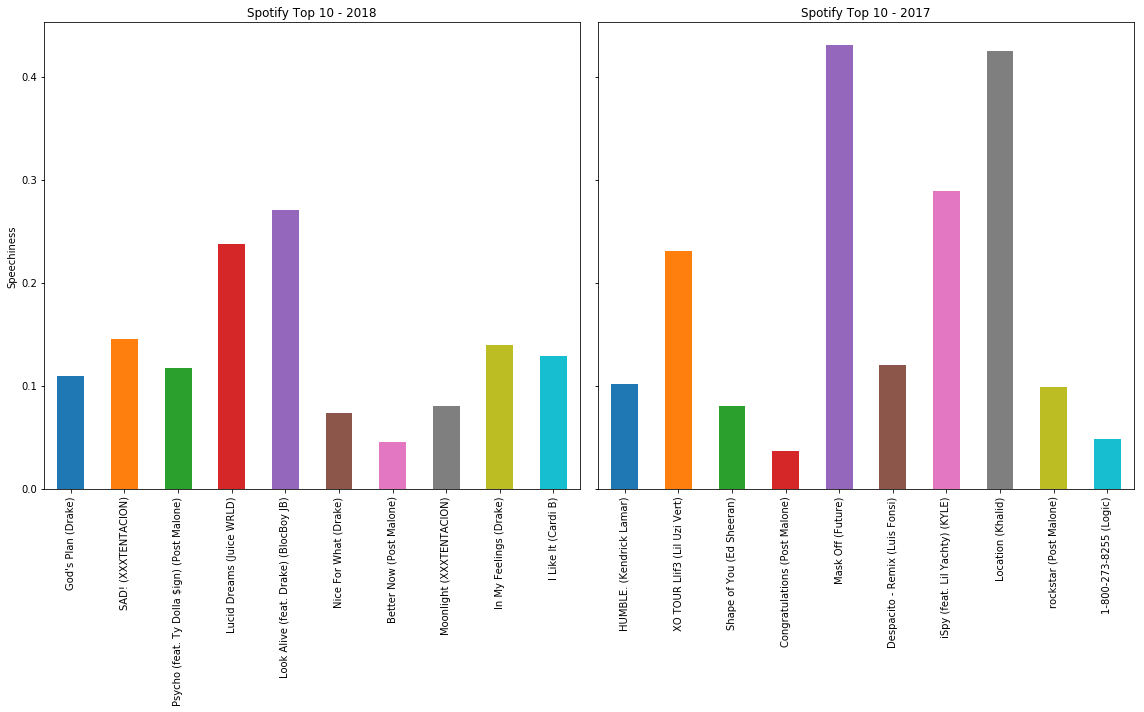

In [17]:
fig = plot_comparison('Speechiness')

# Compute Feature Averages

In [18]:
top_2018_means = top_10_2018_df.drop(['Track Name', 'Artist', 'Streams', 'Popularity', 'Label'], axis=1).mean()
top_2017_means = top_10_2017_df.drop(['Track Name', 'Artist', 'Streams', 'Popularity', 'Label'], axis=1).mean()

In [19]:
average_df = pd.DataFrame({'2018': top_2018_means, '2017': top_2017_means})
average_df = average_df.reset_index()
average_df

,index,2018,2017
0,Acousticness,0.242054,0.244612
1,Danceability,0.763100,0.730400
2,Key,7.200000,4.100000
3,Liveness,0.241500,0.146010
4,Loudness,-6.468500,-6.608200
5,Speechiness,0.134540,0.186080
6,Tempo,120.080000,117.817200
7,Time Signature,4.000000,4.000000
8,Valence,0.497500,0.483000
9,Energy,0.613300,0.628300


# Compare Feature Averages

In [20]:
def plot_loudness(ax, df):
    # Loudness is on a negative scale - 0 is the loudest
    # So make sure that the tallest bar is used for the loudest songs
    
    minval = df.iloc[:, 1:].min().min()
    minval += np.sign(minval) 
    def neg_tick(x, pos):
        return '%.1f' % (x + minval if x != minval else 0)

    formatter = FuncFormatter(neg_tick)
    ax.yaxis.set_major_formatter(formatter)
    df.iloc[:,1:] += -minval
    df.plot(kind='bar', title='Loudness', ax=ax, legend=False)

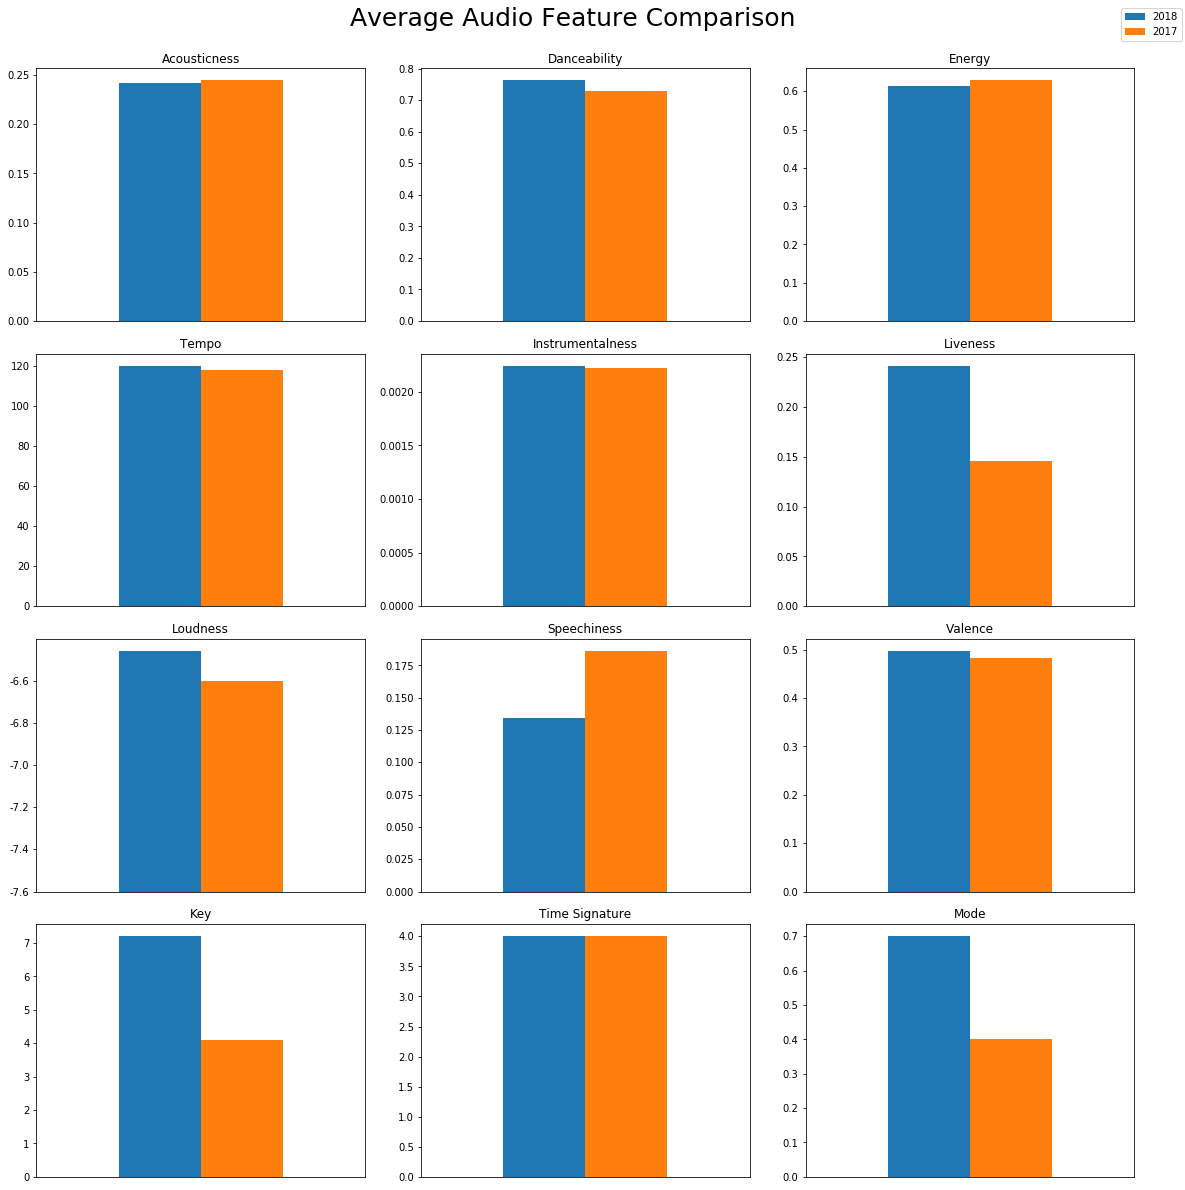

In [21]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

average_df[average_df['index']=='Acousticness'].plot(kind='bar', title='Acousticness', ax=ax1, legend=False)
average_df[average_df['index']=='Danceability'].plot(kind='bar', title='Danceability', ax=ax2, legend=False)
average_df[average_df['index']=='Energy'].plot(kind='bar', title='Energy', ax=ax3, legend=False)
average_df[average_df['index']=='Tempo'].plot(kind='bar', title='Tempo', ax=ax4, legend=False)
average_df[average_df['index']=='Instrumentalness'].plot(kind='bar', title='Instrumentalness', ax=ax5, legend=False)
average_df[average_df['index']=='Liveness'].plot(kind='bar', title='Liveness', ax=ax6, legend=False)
plot_loudness(ax7, average_df[average_df['index']=='Loudness'])
average_df[average_df['index']=='Speechiness'].plot(kind='bar', title='Speechiness', ax=ax8, legend=False)
average_df[average_df['index']=='Valence'].plot(kind='bar', title='Valence', ax=ax9, legend=False)
average_df[average_df['index']=='Key'].plot(kind='bar', title='Key', ax=ax10, legend=False)
average_df[average_df['index']=='Time Signature'].plot(kind='bar', title='Time Signature', ax=ax11, legend=False)
average_df[average_df['index']=='Mode'].plot(kind='bar', title='Mode', ax=ax12, legend=False)

# Do not show XTicks
for ax in fig.get_axes():
    ax.set_xticks([])

# Figure Title
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,  ncol=1, bbox_to_anchor=(1, 1), borderaxespad=-3)
fig.suptitle('Average Audio Feature Comparison', fontsize=25, y=1.03)

plt.tight_layout()

### Compare Most Commonly Used Mode, Key,  and Time Signature
- Keys - 0:'C', 1:'C♯,D♭', 2:'D', 3:'D♯,E♭', 4:'E', 5:'F', 6:'F♯,G♭', 7:'G', 8:'G♯,A♭', 9:'A', 10:'A♯,B♭', 11:'B'
- Modes - 0:'Minor', 1:'Major'

In [29]:
top_2017_mode = top_10_2017_df['Mode'].mode().item()
top_2017_key_mode = top_10_2017_df['Key'].mode().item()
top_2017_timesig_mode = top_10_2017_df['Time Signature'].mode().item()

top_2018_mode = top_10_2018_df['Mode'].mode().item()
top_2018_key_mode = top_10_2018_df['Key'].mode().item()
top_2018_timesig_mode = top_10_2018_df['Time Signature'].mode().item()


print(top_2017_mode)
print(top_2017_timesig_mode)
print(top_2018_mode)
print(top_2018_timesig_mode)
print(top_2017_key_mode)
print(top_2018_key_mode)

mode_df = pd.DataFrame({"Category":['2017', '2018'],
                        "Mode":[top_2017_mode, top_2018_mode],
                        "Time Signature":[top_2017_timesig_mode, top_2018_timesig_mode],
                        "Key":[top_2017_key_mode, top_2018_key_mode]})
mode_df = mode_df.set_index('Category')
mode_df = mode_df.T.reset_index()
mode_df

0
4
1
4
1
8


Category,index,2017,2018
0,Mode,0,1
1,Time Signature,4,4
2,Key,1,8


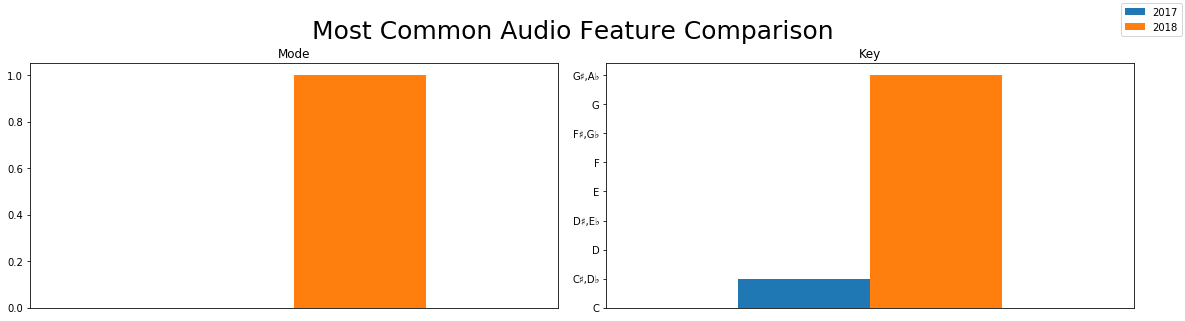

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

mode_df[mode_df['index']=='Mode'].plot(kind='bar', title='Mode', ax=ax1, legend=False)
mode_df[mode_df['index']=='Key'].plot(kind='bar', title='Key', ax=ax2, legend=False)
mode_df[mode_df['index']=='Time Signature'].plot(kind='bar', title='Time Signature', ax=ax3, legend=False)

for ax in fig.get_axes():
    ax.set_xticks([])
    
keys = { 0:'C', 1:'C♯,D♭', 2:'D', 3:'D♯,E♭', 4:'E', 5:'F', 6:'F♯,G♭', 7:'G', 8:'G♯,A♭', 9:'A', 10:'A♯,B♭', 11:'B' }
ax2.set_yticklabels(labels=keys.values())
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,  ncol=1, bbox_to_anchor=(1, 1), borderaxespad=-3)
fig.suptitle('Most Common Audio Feature Comparison', fontsize=25, y=1.06)

plt.tight_layout()